In [5]:
pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 351.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob

     ------------------------------------ 636.8/636.8 kB 852.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries #
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Twitter api credentials#
apiKey = 'eR********************'
apiSecret = 'E***********************************OD'
accessToken = '1*************************************z'
accessTokenSecret = 'm*************************************' 

In [5]:
#creating the Authentication object#
authenticate = tweepy.OAuthHandler(apiKey, apiSecret)

#Set access token and Access secret#
authenticate.set_access_token(accessToken, accessTokenSecret)

#create api object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [7]:
#extract 200 tweets from the twitter user(@PeterObi)
posts = api.user_timeline(screen_name = 'PeterObi', count = 2055, tweet_mode = 'extended')
print('show the 5 recent tweets: \n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i = i + 1

show the 5 recent tweets: 

1) Onitsha, Anambra State belongs to Obi-Datti!!! Grandiose Rally is happening Now. -PO https://t.co/EZNN75Q3Np

2) Arriving at the Traditional Rulers Council Hall, Government House, Awka for a meeting with Anambra State Council of Traditional Rulers under the chairmanship of HRH, Igwe Nnaemeka Achebe, the Obi of Onitsha. -PO https://t.co/l4HjzQYh5y

3) I just arrived at the venue of the town hall meeting with Anambra State students in Awka. -PO https://t.co/JavNffpiSM

4) However, it became impossible to carry out the visits following the mammoth crowd. I apologise and promise to repeat the visits. -PO

5) I sincerely want to apologise to the Traditional Rulers and the people of Delta Central, who gathered at Olomu, the people of Isoko who I was supposed to meet at Oleh and the people of Agbor who came out in their numbers to welcome me to their domains.



In [11]:
# create a dataframe with a column called tweets to store the data retrived from @PeterObi#
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=["Tweets"])
df.head()

,Tweets
0,"Onitsha, Anambra State belongs to Obi-Datti!!!..."
1,Arriving at the Traditional Rulers Council Hal...
2,I just arrived at the venue of the town hall m...
3,"However, it became impossible to carry out the..."
4,I sincerely want to apologise to the Tradition...


In [16]:
# Cleaning the dataframe#
#create a function to clean text#
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) #removing @mentions
    text = re.sub(r'#', '', text) #removing '#' symbols
    text = re.sub(r'RT : [\s]+', '', text) # removing RT
    text = re.sub(r'https?:\/\/\S+', "", text) #removing the hyperlink
    
    return text

#apply clean text function to the dataframe
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()


,Tweets,Subjectivity,Polarity
0,"Onitsha, Anambra State belongs to Obi-Datti!!!...",0.00,0.000000
1,Arriving at the Traditional Rulers Council Hal...,0.75,0.000000
2,I just arrived at the venue of the town hall m...,0.00,0.000000
3,"However, it became impossible to carry out the...",0.55,-0.333333
4,I sincerely want to apologise to the Tradition...,0.60,0.325000


Subjectivity or Polarity
POLARITY - is a float which lies in range of -1,1 where 1 means positive statement and -1 means a negative statement
SUBJECTIVITY - generally refers to personal opinion, emotions or judgements. this is also a float which lies in the range of 0,1

In [15]:
# Create a function to get Subjectivity and Polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create 2 columns

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

#Show the dataframe with the new column
df.head()


,Tweets,Subjectivity,Polarity
0,"Onitsha, Anambra State belongs to Obi-Datti!!!...",0.00,0.000000
1,Arriving at the Traditional Rulers Council Hal...,0.75,0.000000
2,I just arrived at the venue of the town hall m...,0.00,0.000000
3,"However, it became impossible to carry out the...",0.55,-0.333333
4,I sincerely want to apologise to the Tradition...,0.60,0.325000


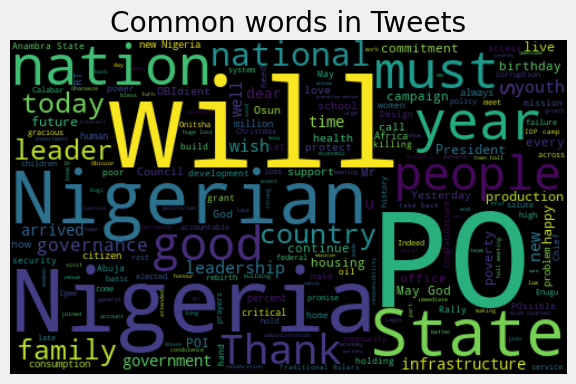

In [54]:
# word cloud to make the common words bigger#
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state =21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.title('Common words in Tweets')
plt.show()

In [18]:
#Function that will generate the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return "Negative"
    elif score ==0:
        return "Neutral"
    else:
        return "Positive"

In [19]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Onitsha, Anambra State belongs to Obi-Datti!!!...",0.00,0.000000,Neutral
1,Arriving at the Traditional Rulers Council Hal...,0.75,0.000000,Neutral
2,I just arrived at the venue of the town hall m...,0.00,0.000000,Neutral
3,"However, it became impossible to carry out the...",0.55,-0.333333,Negative
4,I sincerely want to apologise to the Tradition...,0.60,0.325000,Positive


In [22]:
#Return all positive tweets in a function
PositiveTweets=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(PositiveTweets) + ') '+sortedDF['Tweets'][i])
        print()
        PositiveTweets = PositiveTweets+1




1) I sincerely want to apologise to the Traditional Rulers and the people of Delta Central, who gathered at Olomu, the people of Isoko who I was supposed to meet at Oleh and the people of Agbor who came out in their numbers to welcome me to their domains.

2) Delta OBIdients, Thank you all for your very gracious and warm reception. We will never let you down! -PO 

3) I am in the palace of the Asagba of Asaba. Grateful for the wise counsel and prayers. -PO 

4) We are going to dismantle the confusion in Ports Administration and get this country to work. 

Fuel subsidy is an organised crime and I will remove it immediately, if I am elected President.

Which reasonable country will spend more on subsidy than Education, Health etc. - PO 

5) Thanks to the good people of Osun State for the turnout, warmth and support. Osun Obidient Family showed their commitment, and this made the Osogbo Rally lively and fun. Salute. -PO 

6) My dear wife and I arrived at the venue of the town hall meeting

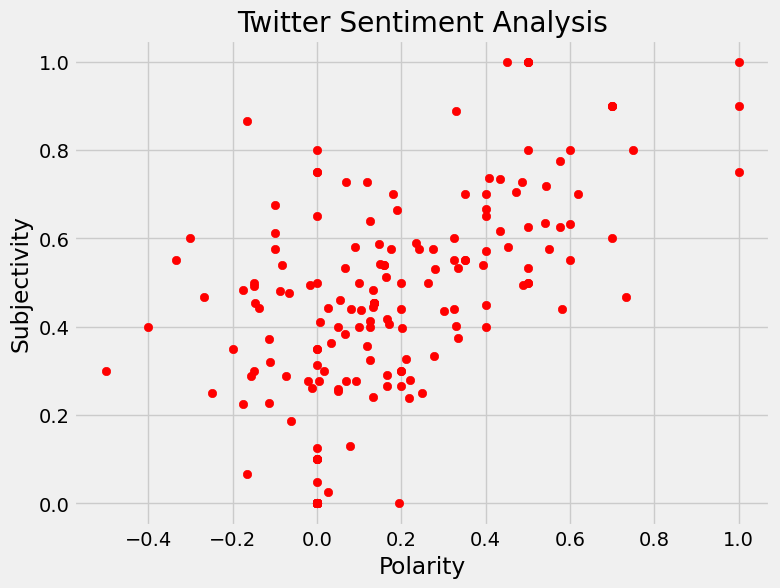

In [23]:
#grapical representation of polarity and subjectivity on a scatterplot

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [60]:
#percentage of positive tweets
positiveTweets = df[df.Analysis == 'Positive']
positiveTweets = positiveTweets['Tweets']

round( (positiveTweets.shape[0] / df.shape[0]) *100, 1)

58.5

In [61]:
#percentage of Negative tweets
NegativeTweets = df[df.Analysis == 'Negative']
NegativeTweets = NegativeTweets['Tweets']

round( (NegativeTweets.shape[0] / df.shape[0]) *100, 1)

15.5

In [62]:
#percentage of Neutral tweets
NeutralTweets = df[df.Analysis == 'Neutral']
NeutralTweets = NeutralTweets['Tweets']

round( (NeutralTweets.shape[0] / df.shape[0]) *100, 1)

26.0

In [63]:
# show the value counts
df['Analysis'].value_counts()


Positive    117
Neutral      52
Negative     31
Name: Analysis, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

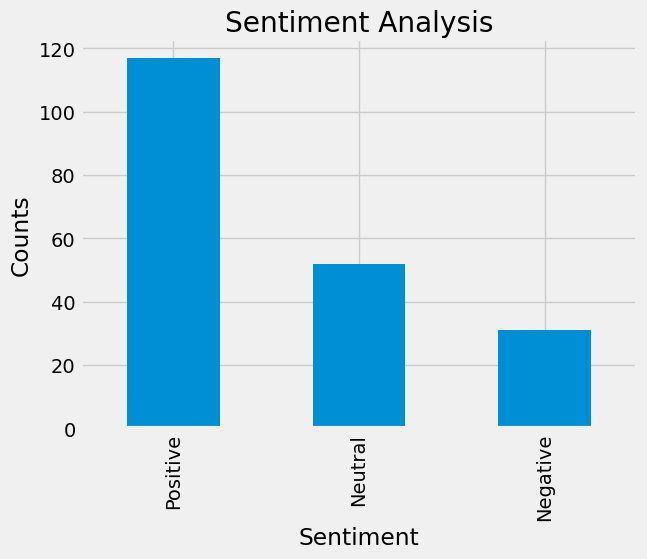

In [64]:
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

In [66]:
my_explode=(0,0.1,0)
my_labels='Positive','Negative','Neutral'
sizes=df['Analysis'].value_counts()
colors=['yellowgreen','lightcoral','blue']


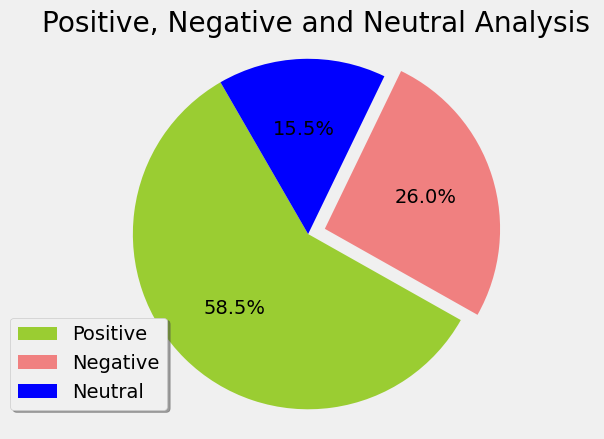

In [67]:
plt.pie(sizes,explode=my_explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.title('Positive, Negative and Neutral Analysis')
plt.legend(my_labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("sentiment_Analysis.png")